# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

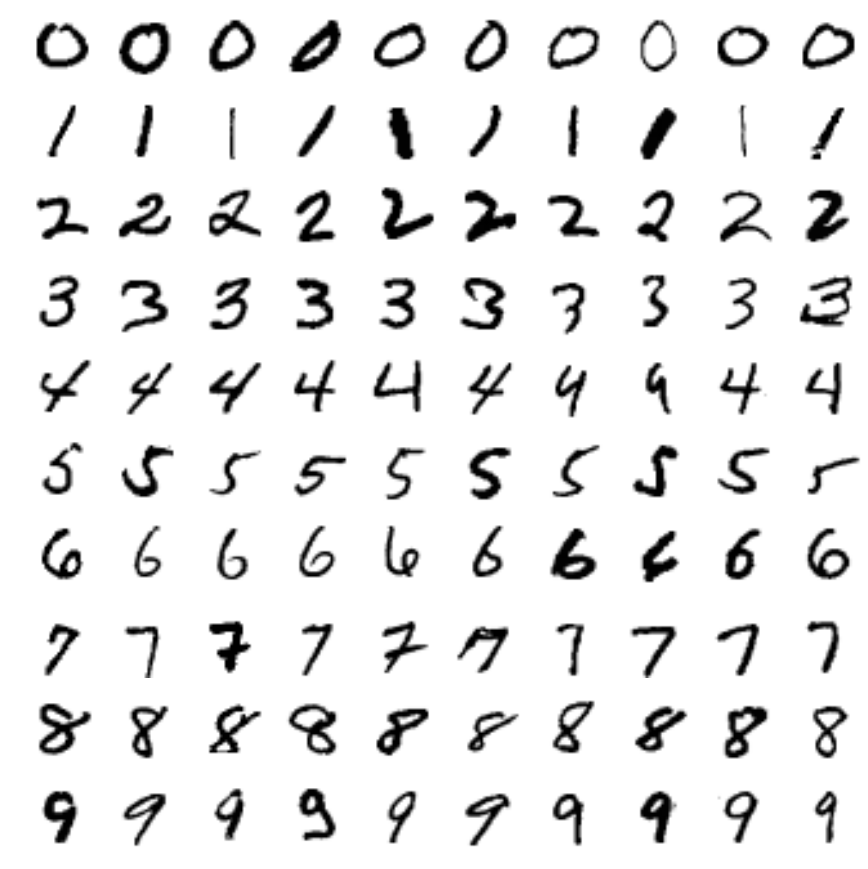

In [8]:
def P1(num_example):
    # set plot size to 15 by 15
    plt.figure(figsize=(15,15))
    # reverse grayscale
    plt.set_cmap('gray_r')
    
    # select 10 examples from each class
    data_example =np.zeros((1,784))
    for i in range(num_example):
        class_data = X[Y==i]
        class_data = class_data[range(num_example),]
        data_example = np.vstack((data_example, class_data))
    
    data_example = data_example[range(1,num_example**2 +1),]
    
    # plot the examples
    for i in range(num_example**2): 
        plt.subplot(num_example, num_example, i+1)
        image_example = data_example[i]
        image_example.shape=(28, 28)
        plt.imshow(image_example)
        plt.axis('off')

# create 10x10 grid to visualize 10 examples of each digit
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [9]:
def P2(k_values):

    accuracy_list = np.zeros(len(k_values))

    count = 0
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        # model using mini training set
        model.fit(mini_train_data, mini_train_labels)
        dev_predict = model.predict(dev_data)
        # for k=1, show precision, recall, f1 score for each label
        if k==1: 
          print classification_report(dev_labels, dev_predict)
    
        # use KNeighborsClassifier.score function to calculate accuracy
        accuracy = model.score(dev_data, dev_labels)
        accuracy_list[count] = accuracy
        count+=1
   
    return accuracy_list

k_values = [1, 3, 5, 7, 9]
P2(k_values)

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



array([ 0.888,  0.878,  0.869,  0.865,  0.863])

ANSWER: 

- The table above shows the precision, recall, f1-score results for k = 1. 

- Looking at the F1-score, the most difficult digit is "9" (F1-score is 0.80). Another contender is the digit "3" (F1-score is 0.82).

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [10]:
def P3(train_sizes, accuracies):

    count = 0
    for size in train_sizes:
        # generate random index and select data 
        index = np.random.random_integers(0,59999,size)
        train_new = train_data[index]
        labels_new = train_labels[index]
        
        # start and end timing ; k=1
        start = time.time()
        clf = KNeighborsClassifier(n_neighbors=1)
        clf.fit(train_new, labels_new)
        dev_predict = clf.predict(dev_data)
        end = time.time()
        
        # calculate duration (end time - start time) 
        duration = end - start

        # calculate accuracy 
        accuracy = clf.score(dev_data, dev_labels)
        print '[Sample size %3d]: %3.3f seconds, %3.4f accuracy' %(index.shape[0],duration,accuracy)
    
        accuracies[count] = accuracy
        count += 1
    
    return accuracies

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = np.zeros(len(train_sizes))
P3(train_sizes, accuracies)

[Sample size 100]: 0.118 seconds, 0.7190 accuracy
[Sample size 200]: 0.227 seconds, 0.7800 accuracy
[Sample size 400]: 0.481 seconds, 0.8040 accuracy
[Sample size 800]: 0.986 seconds, 0.8650 accuracy
[Sample size 1600]: 2.165 seconds, 0.8950 accuracy
[Sample size 3200]: 4.747 seconds, 0.9250 accuracy
[Sample size 6400]: 8.270 seconds, 0.9450 accuracy
[Sample size 12800]: 16.869 seconds, 0.9490 accuracy
[Sample size 25000]: 36.591 seconds, 0.9670 accuracy


array([ 0.719,  0.78 ,  0.804,  0.865,  0.895,  0.925,  0.945,  0.949,
        0.967])

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [11]:
train_accuracies = P3(train_sizes,accuracies)

[Sample size 100]: 0.121 seconds, 0.6980 accuracy
[Sample size 200]: 0.255 seconds, 0.7680 accuracy
[Sample size 400]: 0.506 seconds, 0.8400 accuracy
[Sample size 800]: 0.971 seconds, 0.8950 accuracy
[Sample size 1600]: 1.944 seconds, 0.9020 accuracy
[Sample size 3200]: 3.940 seconds, 0.9150 accuracy
[Sample size 6400]: 8.039 seconds, 0.9380 accuracy
[Sample size 12800]: 16.674 seconds, 0.9560 accuracy
[Sample size 25000]: 37.049 seconds, 0.9620 accuracy


In [12]:
# logit to transform accuracies
def logit(x):
    return np.log(x/(1-x))

logit_accuracies = map(logit, train_accuracies)

# regressio model that predicts accuracy from training size
def P4(input_train_size, accuracies):

    sizes = np.array(train_sizes)
    
    lm = LinearRegression()
    lm.fit(np.array(train_sizes).reshape(9,1),accuracies)
    lm_pred = lm.predict(input_train_size)
    
    return lm_pred

accuracy60000 = P4(60000, accuracies)
logitaccuracy60000 = np.exp(P4(60000,logit_accuracies))/(np.exp(P4(60000,logit_accuracies))+1)

print "60000 samples (without logit transformation) accuracy: %3.4f" %(accuracy60000[0])
print "60000 samples (with logit transformation) accuracy: %3.4f" %(logitaccuracy60000[0])


60000 samples (without logit transformation) accuracy: 1.2395
60000 samples (with logit transformation) accuracy: 0.9981


ANSWER: 
- Accuracy without logit transformation is reported as higher than 1, which should not be possible
- Solution: use the logit function
- Reasoning: domain for logit function is between 0 and 1

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [13]:
# fit 1-NN, return dev data's confusion matrix

def P5():
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_data, train_labels)
    dev_predict = clf.predict(dev_data)
    return confusion_matrix(dev_labels, dev_predict)

print P5()

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]


To find the pairing with the highest confusion, we should look at the highest number that are not along the diagonal line. 
- Example : row 9, column 4 (actual is 8, but predicted as 3 -- happened twice)  
- Example : row 4, column 9 (actual is 3, but predicted as 8 -- happened once)

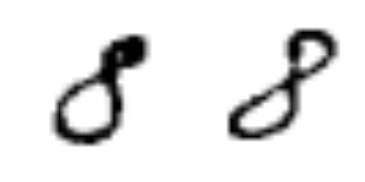

In [14]:
# display example where 8 is predicted as 3
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(train_data, train_labels)
dev_predict = clf.predict(dev_data)
    
ex8_3 = dev_data[np.logical_and(dev_labels==8, dev_predict==3)]
length = ex8_3.shape[0]
for i in range(length):
    plt.subplot(1,length,i+1)
    image = ex8_3[i]
    image.shape=(28, 28)
    plt.imshow(image)
    plt.axis('off')

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Gaussian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [15]:
# create Gaussian Blur function
def gblur(input_image):
    
    # setup for input/output image
    input_image.shape = (28, 28)
    output_image = []

    # set top border
    for top in range(0,28):
        output_image.append(0)    
    
    for i in range(1, 27):
        #for border set edge pixel to 0    
        output_image.append(0)
        for j in range (1, 27):
            # used weights from 
            # http://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm
            pixel_sum = []        
            pixel_sum.append(input_image[i-1,j-1]*0.0947416)
            pixel_sum.append(input_image[i-1,j]*0.118318)
            pixel_sum.append(input_image[i-1,j+1]*0.0947416)        
            pixel_sum.append(input_image[i,j-1]*0.118318)
            pixel_sum.append(input_image[i,j+1]*0.118318)        
            pixel_sum.append(input_image[i+1,j-1]*0.0947416)
            pixel_sum.append(input_image[i+1,j]*0.118318)
            pixel_sum.append(input_image[i+1,j+1]*0.0947416)
            total=sum(pixel_sum)
            #print 'current pixel blur value = ', total
            output_image.append(total)
        # for border set edge pixel to 0
        output_image.append(0)
    # set bottom border    
    for bottom in range(0,28):
        output_image.append(0)
    return output_image


(-0.5, 27.5, 27.5, -0.5)

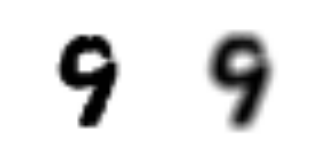

In [16]:
# input and output sample example

plt.figure(figsize=(5,10))
plt.set_cmap('gray_r')

# input image
input_image = mini_train_data[1]
input_image.shape = (28, 28)
plt.subplot(1, 2, 1) 
plt.imshow(input_image)       
plt.axis('off')  

# output image
output_image = np.reshape(gblur(mini_train_data[1]), (-1, 28))
plt.subplot(1, 2, 2)
plt.imshow(output_image)       
plt.axis('off')  


In [17]:
#Preprocess train data only
clf = GaussianNB()
blurred_train = []
for i in range(0, len(mini_train_data)):
    blurred_train.append(gblur(mini_train_data[i]))
clf.fit(blurred_train, mini_train_labels)
print 'blurred train data: ', (clf.score(dev_data, dev_labels))    

#Preprocess test data only
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
blurred_test = []
for i in range(0, len(dev_data)):
    blurred_test.append(gblur(dev_data[i]))
print 'blurred test data: ', (clf.score(blurred_test, dev_labels))    

#Preprocess both
clf = GaussianNB()
clf.fit(blurred_train, mini_train_labels)
print 'blurred both: ', (clf.score(blurred_test, dev_labels))    


blurred train data:  0.664
blurred test data:  0.485
blurred both:  0.638


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [18]:
# Bernoulli Naive Bayes
NB_b = BernoulliNB()
NB_b.fit(train_data, train_labels)
NB_b_predict = NB_b.predict(dev_data)

# print report
print 'Bernoulli NB: ', (NB_b.score(dev_data, dev_labels))


Bernoulli NB:  0.826


In [19]:
# transform data function for multinomial NB use

def transform(data, t1, t2):
    for i in range(data.shape[0]):
        new_data = data
        new_array = data[i]
        # values less than the first threshold are set as 0
        new_data[i, new_array <= t1] = 0
        # values in between thresholds are set as 1
        new_data[i,np.logical_and(new_array>t1, new_array<=t2)]=1
        # values greater than second threshold is set as 2
        new_data[i, new_array > t2] = 2
    return new_data

trans_data = transform(train_data,0.15,0.85)


In [20]:
# use transformed data, fit multinomial Naive Bayes 
NB_m = MultinomialNB()
NB_m.fit(trans_data, train_labels)

# predict development data
NB_m_predict = NB_m.predict(dev_data)
print 'Multinomial NB: ', (NB_m.score(dev_data, dev_labels))


Multinomial NB:  0.822


ANSWER: 
- Given the threshold 0.15 and 0.85, the multinomial NB had a higher accuracy (0.845 vs 0.837)
- However, there is a lot of room to play around with various thresholds
- Having a 3 groups (0,1,2) kind of emulates blurring (blurring ~ gray pixels)

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [21]:
def P8(alphas):
    NB_bm = GridSearchCV(BernoulliNB(),alphas,cv=10,scoring='f1_weighted')
    return NB_bm.fit(train_data,train_labels)

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


/Users/sallyhong/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Users/sallyhong/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print nb.best_params_

{'alpha': 0.0001}


In [23]:
NB_b0 = BernoulliNB(alpha=0)
NB_b0.fit(train_data,train_labels)
NB_b0_predict = NB_b0.predict(dev_data)
print classification_report(dev_labels,NB_b0_predict)

             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18        99
        1.0       0.00      0.00      0.00       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.00      0.00      0.00        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.01      0.10      0.02      1000



/Users/sallyhong/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ANSWER:
- best alpha value: 0.0001
- when alpha is 0, accuracy of model is very low

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [24]:
# train Gaussian NB
NB_g = GaussianNB()
NB_g.fit(train_data, train_labels)
NB_g_predict = NB_g.predict(dev_data)
print classification_report(dev_labels, NB_g_predict)

             precision    recall  f1-score   support

        0.0       0.58      0.67      0.62        99
        1.0       0.38      1.00      0.55       105
        2.0       0.80      0.04      0.07       102
        3.0       0.83      0.12      0.20        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.52      0.86      0.65        98
        7.0       0.92      0.10      0.18       113
        8.0       0.24      0.15      0.18        96
        9.0       0.25      0.85      0.39       106

avg / total       0.45      0.38      0.29      1000



In [25]:
# retrieve log probabilty of Bernoulli NB
NB_b2 = BernoulliNB()
NB_b2.fit(train_data,train_labels)

# assign theta and sigma
NB_theta = np.exp(NB_b2.feature_log_prob_)
NB_sigma = NB_theta * (1 - NB_theta)

In [26]:
def P9(theta, sigma, traindata, trainlabels, devdata, devlabels):
### STUDENT START ###
    clf = GaussianNB()
    clf.fit(traindata, trainlabels)
    clf.theta_ = theta
    clf.sigma_ = sigma
    clf_pred = clf.predict(devdata)
    print classification_report(devlabels, clf_pred)
    return clf
### STUDENT END ###

gnb2 = P9(NB_theta,NB_sigma,train_data,train_labels,dev_data,dev_labels)


             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89        99
        1.0       0.66      0.98      0.79       105
        2.0       0.90      0.37      0.53       102
        3.0       0.74      0.65      0.69        86
        4.0       0.91      0.51      0.65       104
        5.0       0.87      0.22      0.35        91
        6.0       0.73      0.92      0.81        98
        7.0       0.87      0.46      0.60       113
        8.0       0.46      0.59      0.52        96
        9.0       0.44      0.93      0.60       106

avg / total       0.74      0.66      0.64      1000



ANSWER: 
- The Bernoulli distribution (a special kind of can be approximated as a normal distribution
- Given same mean and variance, the probabilities between the two should be similar
- For a feature $x_i$, $P(x_i|y)$ has a Bernoulli(p) distribution where mean is $p$ and variance is $p(1-p)$
- Maximum likelihood estimator of p : the proportion of 1's in the same (the log of it is given by feature_log_prob from the BernoulliNB object)

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

<built-in method reshape of numpy.ndarray object at 0x115cdd210>


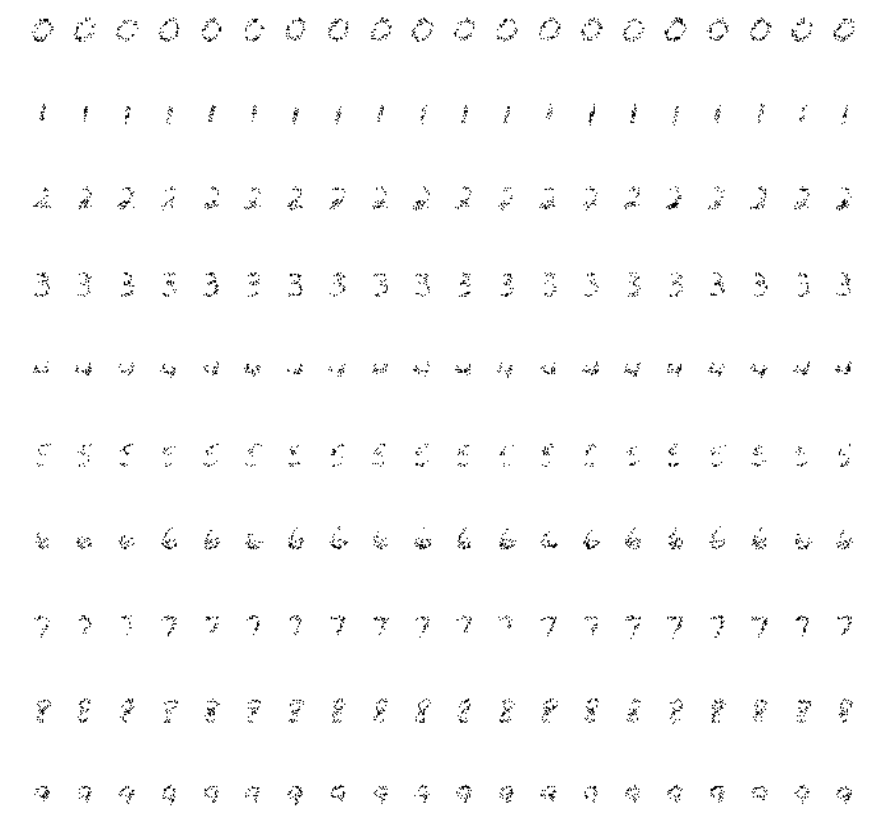

In [28]:
def P10(num_examples):
    
    # fit Bernoulli
    NB_b3 = BernoulliNB(binarize=0)
    NB_b3.fit(train_data, train_labels)
    
    # generate random pixel values, based on probabilities from the Naive Bayes
    NB_prob = np.repeat(np.exp(NB_b3.feature_log_prob_), num_examples, axis=0)
    rand = np.random.rand(10*num_examples, 784)
    pixels = NB_prob * rand
    
    # binarize the pixel values
    pixels[pixels>0.5]=1
    pixels[pixels<0.5]=0
    plt.figure(figsize=(15,15))
    plt.set_cmap('gray_r')
    
    # plot
    for i in range (0,10*num_examples):    
        plt.subplot(10, 20, i+1)
        my_image = pixels[i]
        my_image.shape = (28, 28)
        plt.imshow(my_image)
        plt.axis('off')
    
    return NB_prob
    
NB_grid = P10(20)
print NB_grid.reshape

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [29]:
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
clf = BernoulliNB(alpha=0.0001)
clf.fit(mini_train_data, mini_train_labels)
clf_predict = clf.predict(dev_data)
clf_prob = clf.predict_proba(dev_data)

correct = [0, 0, 0, 0, 0, 0, 0, 0, 0]
total = [0, 0, 0, 0, 0, 0, 0, 0, 0]


for pred, prob, label in zip(clf_predict, clf_prob, dev_labels):
    maxProb = max(prob)
    if maxProb == 1: index = 8
    elif maxProb > 0.9999999999999: index = 7    
    elif maxProb > 0.99999999999: index = 6
    elif maxProb > 0.999999999: index = 5
    elif maxProb > 0.9999999: index = 4
    elif maxProb > 0.99999: index = 3
    elif maxProb > 0.999: index = 2
    elif maxProb > 0.9: index = 1
    elif maxProb > 0.5: index = 0
    if pred == label: correct[index]+=1
    total[index]+=1
print 'prob ===', clf_prob[2]
for i in range(len(buckets)):
    accuracy = 0.00
    if (total[i] > 0):        
        accuracy = float(correct[i])/total[i] 
    print 'p(pred) <= %.13f  total = %3d accuracy = %.3f' %(buckets[i], total[i], accuracy)



prob === [  2.10757398e-091   7.85695626e-191   9.83433270e-042   2.73229272e-081
   8.17890584e-102   3.20947251e-087   1.00000000e+000   2.13936955e-143
   2.50683061e-095   3.06848131e-113]
p(pred) <= 0.5000000000000  total =  29 accuracy = 0.414
p(pred) <= 0.9000000000000  total =  64 accuracy = 0.531
p(pred) <= 0.9990000000000  total =  47 accuracy = 0.511
p(pred) <= 0.9999900000000  total =  66 accuracy = 0.470
p(pred) <= 0.9999999000000  total =  56 accuracy = 0.732
p(pred) <= 0.9999999990000  total =  40 accuracy = 0.700
p(pred) <= 0.9999999999900  total =  42 accuracy = 0.690
p(pred) <= 0.9999999999999  total =  16 accuracy = 0.938
p(pred) <= 1.0000000000000  total = 640 accuracy = 0.934


ANSWER: 
- Higher posterial probability buckets have higher accuracies
- Bernoulli Naive Bayes is a well calibrated model